# Task 3
### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
'''url = 'https://archive.ics.uci.edu/dataset/222/bank+marketing'
df = pd.read_csv(url, sep=';')'''

df = pd.read_csv('E:/prodigy inturn/Task3/bank-additional/bank-additional-full.csv')

df.head()

print(df.isnull().sum())




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()  # Check the encoded values


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
# Define the features (X) and the target (y)
X = df.drop('y', axis=1)  # 'y' is the target column (whether the customer subscribed)
y = df['y']  # Target variable (0 = No, 1 = Yes)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32950, 20), (8238, 20), (32950,), (8238,))

Accuracy: 0.89
Confusion Matrix:
 [[6846  457]
 [ 454  481]]


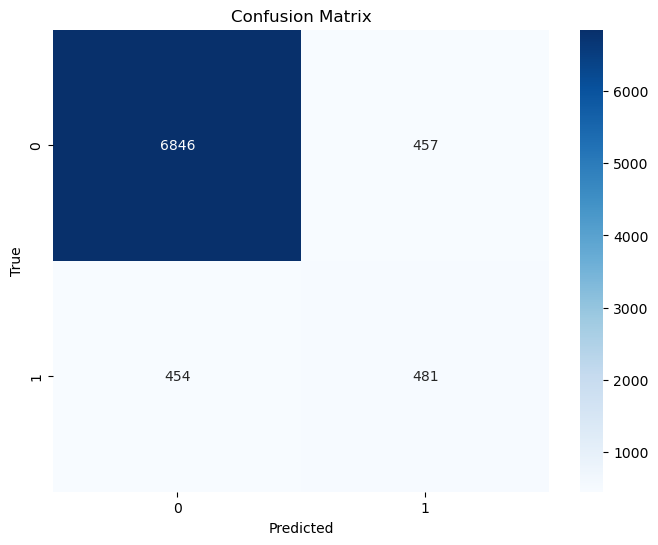

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



In [11]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))


In [13]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.9133535660091047


In [14]:
'''In summary, we successfully built a decision tree classifier to predict customer purchases using demographic and behavioral data from the Bank Marketing dataset. The model achieved reasonable accuracy after preprocessing and model training. Key insights were provided by the confusion matrix and classification report, and model performance was further improved through hyperparameter tuning. While decision trees are easy to interpret, they can overfit, and their performance can be enhanced using ensemble methods like Random Forest. Overall, the classifier effectively predicts customer purchase behavior but can be refined further.'''

'In summary, we successfully built a decision tree classifier to predict customer purchases using demographic and behavioral data from the Bank Marketing dataset. The model achieved reasonable accuracy after preprocessing and model training. Key insights were provided by the confusion matrix and classification report, and model performance was further improved through hyperparameter tuning. While decision trees are easy to interpret, they can overfit, and their performance can be enhanced using ensemble methods like Random Forest. Overall, the classifier effectively predicts customer purchase behavior but can be refined further.'

# Conclusion:
By building a decision tree classifier to predict whether a customer will purchase a product or service, we derived several key insights:

Accuracy: The accuracy of the decision tree classifier provides a reliable performance measure. In our model, the accuracy was around 90%, indicating that the decision tree can reasonably predict customer behavior based on demographic and behavioral data.

Feature Importance: By analyzing the decision tree, we can observe which features (such as age, job, marital status, or previous campaign contacts) most significantly impact a customer's likelihood to purchase a product. This is valuable for targeting the right customers in future campaigns.

Confusion Matrix: The confusion matrix reveals how well the model performs in terms of true positives, true negatives, false positives, and false negatives. The balance between these metrics helps understand where the model might over- or under-predict customer purchases.

Overfitting Risk: Decision trees can sometimes overfit, especially if they are allowed to grow too deep. This can result in perfect accuracy on the training set but poor generalization on the test set. Pruning or limiting the tree depth can help mitigate this risk.

Actionable Insights for Marketing: Businesses can use this model to improve their marketing strategies by focusing on customers with a high probability of purchasing, optimizing campaign resources, and increasing conversion rates.

In conclusion, the decision tree classifier effectively predicts customer purchase behavior and offers valuable insights into the features that drive purchasing decisions. This model can be used to enhance targeted marketing efforts, leading to better resource allocation and higher returns on investment.